In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font="Microsoft JhengHei", palette="Set2")

file_path = "C:\\Users\\maxty\\Downloads\\Smartphone Addiction\\teen_phone_addiction_dataset.csv"
df = pd.read_csv(file_path)

# 保留需要的欄位
keep_cols = [
    'Age', 'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance',
    'Exercise_Hours', 'Anxiety_Level', 'Time_on_Social_Media',
    'Time_on_Gaming', 'Time_on_Education', 'Phone_Usage_Purpose',
    'Weekend_Usage_Hours', 'Addiction_Level'
]
df = df[keep_cols]

print("原始資料前5筆：")
display(df.head())

原始資料前5筆：


,Age,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Exercise_Hours,Anxiety_Level,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Weekend_Usage_Hours,Addiction_Level
0,13,4.0,6.1,78,0.1,10,3.6,1.7,1.2,Browsing,8.7,10.0
1,17,5.5,6.5,70,0.0,3,1.1,4.0,1.8,Browsing,5.3,10.0
2,13,5.8,5.5,93,0.8,2,0.3,1.5,0.4,Education,5.7,9.2
3,18,3.1,3.9,78,1.6,9,3.1,1.6,0.8,Social Media,3.0,9.8
4,14,2.5,6.7,56,1.1,1,2.6,0.9,1.1,Gaming,3.7,8.6


In [2]:
# === 匯入 SQLite ===
conn = sqlite3.connect("phone_usage.db")
df.to_sql("phone_usage", conn, if_exists="replace", index=False)

3000

In [3]:
# === SQL 分析 ===

# 1. 成癮等級 vs 平均每日使用時間與平均睡眠時間
df1 = pd.read_sql("""
SELECT Addiction_Level, 
       COUNT(*) AS user_count,
       ROUND(AVG(Daily_Usage_Hours), 2) AS avg_usage,
       ROUND(AVG(Sleep_Hours), 2) AS avg_sleep
FROM phone_usage
GROUP BY Addiction_Level
ORDER BY avg_usage DESC
""", conn)
print("\n成癮等級 vs 平均每日使用與睡眠時間：")
display(df1)


成癮等級 vs 平均每日使用與睡眠時間：


,Addiction_Level,user_count,avg_usage,avg_sleep
0,10.0,1524,6.13,6.20
1,9.8,28,5.11,6.46
2,9.7,37,5.09,6.62
3,9.9,50,4.98,6.76
4,9.4,44,4.86,6.67
...,...,...,...,...
75,3.2,2,0.55,6.90
76,2.4,1,0.50,5.30
77,2.1,2,0.45,7.90
78,3.6,1,0.00,7.10


In [4]:
# 2. 不同用途 vs 平均學業表現
df2 = pd.read_sql("""
SELECT Phone_Usage_Purpose, 
       ROUND(AVG(Academic_Performance), 2) AS avg_academic
FROM phone_usage
GROUP BY Phone_Usage_Purpose
ORDER BY avg_academic DESC
""", conn)
print("\n不同手機用途的平均學業表現：")
display(df2)


不同手機用途的平均學業表現：


,Phone_Usage_Purpose,avg_academic
0,Gaming,75.58
1,Education,75.23
2,Browsing,75.00
3,Social Media,74.72
4,Other,74.25


In [5]:
# 3. 遊戲時間 vs 學業表現
df3 = pd.read_sql("""
SELECT Time_on_Gaming, Academic_Performance
FROM phone_usage
""", conn)

In [6]:
# 4. 社交媒體時間 vs 焦慮程度
df4 = pd.read_sql("""
SELECT Time_on_Social_Media, Anxiety_Level
FROM phone_usage
""", conn)

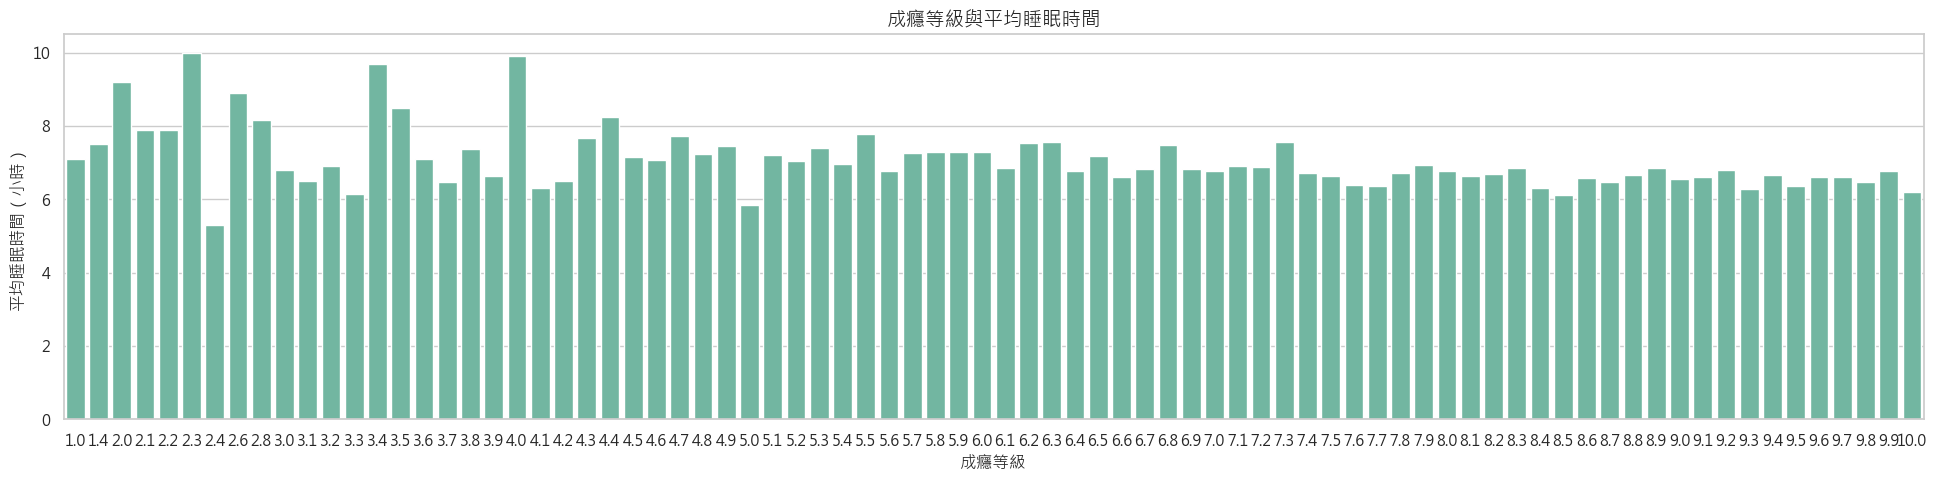

In [7]:
# === Python 視覺化 ===

# 圖1: 成癮等級 vs 平均睡眠時間
plt.figure(figsize=(24,5))
sns.barplot(data=df1, x="Addiction_Level", y="avg_sleep")
plt.title("成癮等級與平均睡眠時間", fontsize=14)
plt.ylabel("平均睡眠時間（小時）")
plt.xlabel("成癮等級")
plt.show()

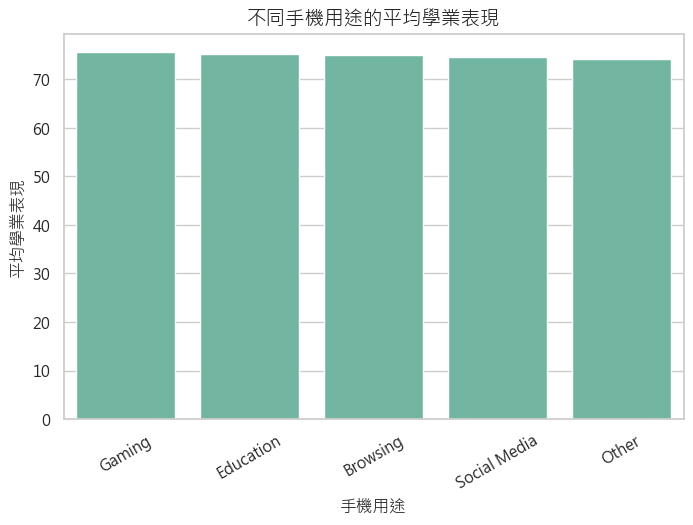

In [8]:
# 圖2: 不同用途 vs 平均學業表現
plt.figure(figsize=(8,5))
sns.barplot(data=df2, x="Phone_Usage_Purpose", y="avg_academic")
plt.title("不同手機用途的平均學業表現", fontsize=14)
plt.ylabel("平均學業表現")
plt.xlabel("手機用途")
plt.xticks(rotation=30)
plt.show()

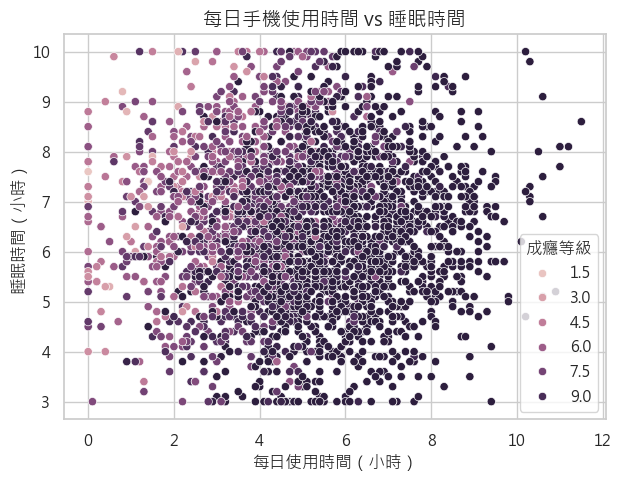

In [9]:
# 圖3: 每日使用時間 vs 睡眠時間
df5 = pd.read_sql("SELECT Daily_Usage_Hours, Sleep_Hours, Addiction_Level FROM phone_usage", conn)
plt.figure(figsize=(7,5))
sns.scatterplot(data=df5, x="Daily_Usage_Hours", y="Sleep_Hours", hue="Addiction_Level")
plt.title("每日手機使用時間 vs 睡眠時間", fontsize=14)
plt.xlabel("每日使用時間（小時）")
plt.ylabel("睡眠時間（小時）")
plt.legend(title="成癮等級")
plt.show()

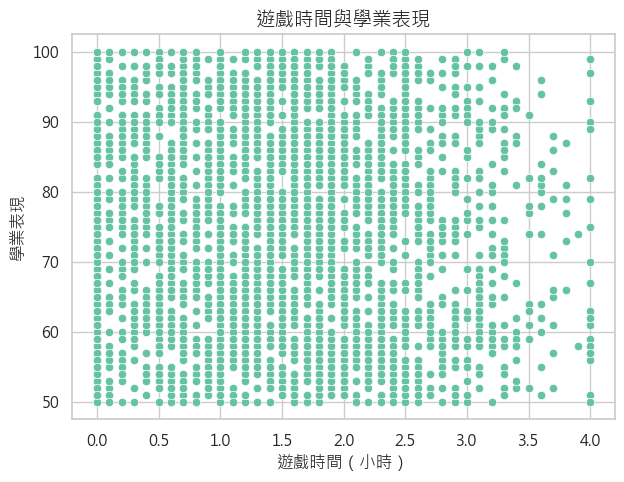

In [10]:
# 圖4: 遊戲時間 vs 學業表現
plt.figure(figsize=(7,5))
sns.scatterplot(data=df3, x="Time_on_Gaming", y="Academic_Performance")
plt.title("遊戲時間與學業表現", fontsize=14)
plt.xlabel("遊戲時間（小時）")
plt.ylabel("學業表現")
plt.show()

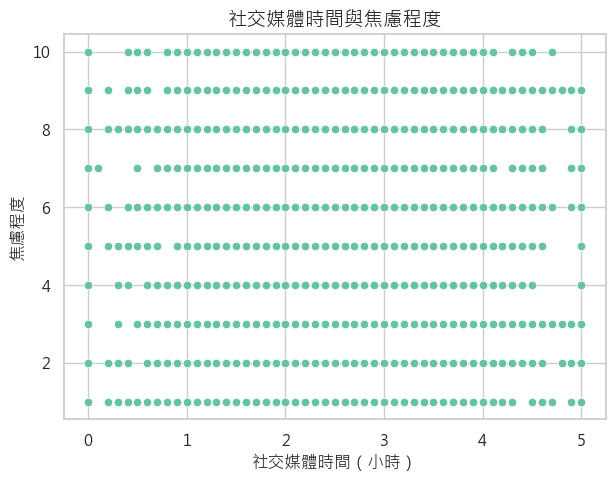

In [11]:
# 圖5: 社交媒體時間 vs 焦慮程度
plt.figure(figsize=(7,5))
sns.scatterplot(data=df4, x="Time_on_Social_Media", y="Anxiety_Level")
plt.title("社交媒體時間與焦慮程度", fontsize=14)
plt.xlabel("社交媒體時間（小時）")
plt.ylabel("焦慮程度")
plt.show()

In [12]:
# 自動生成分析結論
def generate_conclusions(conn):
    conclusions = []

    # 成癮等級與使用/睡眠
    df_usage_sleep = pd.read_sql("""
    SELECT Addiction_Level,
           ROUND(AVG(Daily_Usage_Hours), 2) AS avg_usage,
           ROUND(AVG(Sleep_Hours), 2) AS avg_sleep
    FROM phone_usage
    GROUP BY Addiction_Level
    ORDER BY avg_usage DESC
    """, conn)

    top_addiction = df_usage_sleep.iloc[0]
    conclusions.append(
        f"成癮等級最高的族群 ({top_addiction['Addiction_Level']}) 平均每日使用 {top_addiction['avg_usage']} 小時，"
        f"平均睡眠時間僅 {top_addiction['avg_sleep']} 小時，顯示高度成癮與睡眠不足可能相關。"
    )

    # 手機用途與學業表現
    df_academic = pd.read_sql("""
    SELECT Phone_Usage_Purpose,
           ROUND(AVG(Academic_Performance), 2) AS avg_academic
    FROM phone_usage
    GROUP BY Phone_Usage_Purpose
    ORDER BY avg_academic DESC
    """, conn)

    best_purpose = df_academic.iloc[0]
    worst_purpose = df_academic.iloc[-1]
    conclusions.append(
        f"以手機用於 {best_purpose['Phone_Usage_Purpose']} 的學生，平均學業表現最高（{best_purpose['avg_academic']} 分），"
        f"而以 {worst_purpose['Phone_Usage_Purpose']} 為主要用途的學生學業表現最低（{worst_purpose['avg_academic']} 分）。"
    )

    # 社交媒體與焦慮
    df_anxiety = pd.read_sql("""
    SELECT ROUND(AVG(Time_on_Social_Media), 2) AS avg_social_time,
           ROUND(AVG(Anxiety_Level), 2) AS avg_anxiety
    FROM phone_usage
    """, conn)
    conclusions.append(
        f"平均每日社交媒體使用時間為 {df_anxiety['avg_social_time'][0]} 小時，"
        f"平均焦慮程度為 {df_anxiety['avg_anxiety'][0]} 分，顯示兩者可能存在正向關聯。"
    )

    print("📊 分析結論：\n")
    for i, c in enumerate(conclusions, 1):
        print(f"{i}. {c}")

# 執行自動生成結論
generate_conclusions(conn)


📊 分析結論：

1. 成癮等級最高的族群 (10.0) 平均每日使用 6.13 小時，平均睡眠時間僅 6.2 小時，顯示高度成癮與睡眠不足可能相關。
2. 以手機用於 Gaming 的學生，平均學業表現最高（75.58 分），而以 Other 為主要用途的學生學業表現最低（74.25 分）。
3. 平均每日社交媒體使用時間為 2.5 小時，平均焦慮程度為 5.59 分，顯示兩者可能存在正向關聯。


In [13]:
conn.close()